In [470]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from influxdb import InfluxDBClient
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import linregress

In [471]:
df = pd.read_csv('20200124_ews_observations.csv', low_memory=False)


In [472]:
df.head(20)

,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
0,29,2019-05-01 13:27:50.0000000,NEWS2,0,143.0,0.0,ALERT,0,96.0,0.0,False,0.0,80,0,18,0,36.6,0
1,30,2019-05-01 15:27:44.0000000,NEWS2,3,NaN,NaN,ALERT,0,94.0,1.0,False,0.0,83,0,16,0,36.5,0
2,31,2019-05-01 15:54:27.0000000,NEWS2,1,117.0,0.0,ALERT,0,95.0,1.0,False,0.0,75,0,14,0,37.3,0
3,32,2019-05-01 16:07:27.0000000,NEWS2,0,NaN,NaN,ALERT,0,98.0,0.0,False,0.0,85,0,19,0,37.2,0
4,33,2019-05-01 17:03:16.0000000,NEWS2,0,135.0,0.0,ALERT,0,97.0,0.0,False,0.0,89,0,14,0,36.1,0
5,32,2019-05-01 18:02:29.0000000,NEWS2,0,NaN,NaN,ALERT,0,96.0,0.0,False,0.0,82,0,18,0,37.0,0
6,34,2019-05-01 19:23:49.0000000,NEWS2,0,NaN,NaN,ALERT,0,97.0,0.0,False,0.0,66,0,16,0,36.2,0
7,35,2019-05-01 21:07:36.0000000,NEWS2,0,NaN,NaN,ALERT,0,98.0,0.0,False,0.0,84,0,18,0,37.1,0
8,32,2019-05-01 21:08:05.0000000,NEWS2,0,125.0,0.0,ALERT,0,97.0,0.0,False,0.0,87,0,14,0,37.1,0
9,36,2019-05-01 21:12:11.0000000,NEWS2,2,NaN,NaN,ALERT,0,97.0,0.0,False,0.0,61,0,13,0,35.8,1


In [473]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
PatientId,29,30,31,32,33,32,34,35,32,36,34,32,37,35,38,39,36,30,30,34
ObservationDate,2019-05-01 13:27:50.0000000,2019-05-01 15:27:44.0000000,2019-05-01 15:54:27.0000000,2019-05-01 16:07:27.0000000,2019-05-01 17:03:16.0000000,2019-05-01 18:02:29.0000000,2019-05-01 19:23:49.0000000,2019-05-01 21:07:36.0000000,2019-05-01 21:08:05.0000000,2019-05-01 21:12:11.0000000,2019-05-01 21:13:21.0000000,2019-05-01 23:12:50.0000000,2019-05-02 00:28:57.0000000,2019-05-02 00:41:07.0000000,2019-05-02 00:42:59.0000000,2019-05-02 00:47:03.0000000,2019-05-02 00:52:23.0000000,2019-05-02 01:57:16.0000000,2019-05-02 03:19:01.0000000,2019-05-02 03:31:55.0000000
EwsProcedure,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2
EWS_Total,0,3,1,0,0,0,0,0,0,2,1,0,0,2,1,1,3,6,7,1
SBP,143,NaN,117,NaN,135,NaN,NaN,NaN,125,NaN,117,114,140,123,NaN,110,104,89,87,NaN
SBP_Score,0,NaN,0,NaN,0,NaN,NaN,NaN,0,NaN,0,0,0,0,NaN,1,1,3,3,NaN
LOC,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT
LOC_Score,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
SpO2,96,94,95,98,97,96,97,98,97,97,95,96,98,94,98,99,95,96,95,95
SpO2_Score,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1


In [474]:
df.drop(['EwsProcedure'], axis=1, inplace=True)

In [475]:
#check  for blank spaces
for i in df.columns:
    print (i.isspace())

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [476]:
round((df.isnull().sum()*100)/len(df),2) # relative amount of NaN values in % per column


PatientId          0.00
ObservationDate    0.00
EWS_Total          0.00
SBP                6.28
SBP_Score          6.28
LOC                0.00
LOC_Score          0.00
SpO2               0.00
SpO2_Score         0.00
Add_O2             0.00
Add_O2_Score       0.00
HR                 0.00
HR_Score           0.00
RR                 0.00
RR_Score           0.00
TEMP               0.00
TEMP_Score         0.00
dtype: float64

<AxesSubplot:>

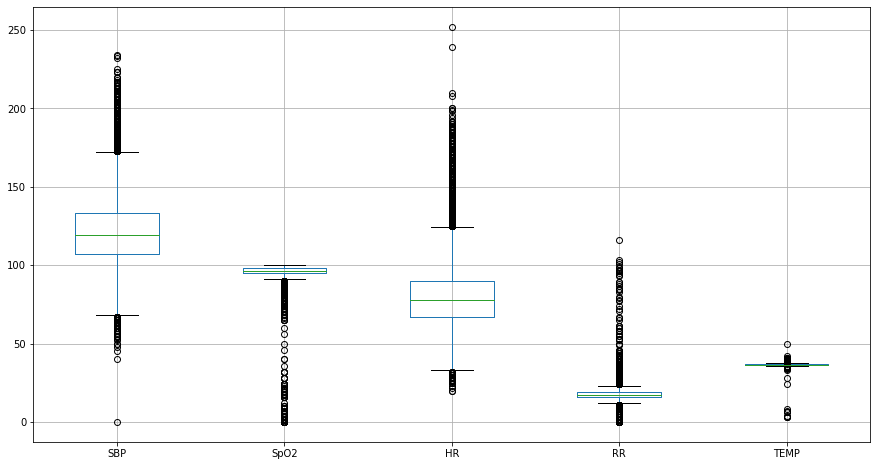

In [477]:

df.boxplot(column=['SBP','SpO2','HR','RR','TEMP'],figsize=(15,8))

array([[<AxesSubplot:title={'center':'PatientId'}>,
        <AxesSubplot:title={'center':'EWS_Total'}>,
        <AxesSubplot:title={'center':'SBP'}>,
        <AxesSubplot:title={'center':'SBP_Score'}>],
       [<AxesSubplot:title={'center':'LOC_Score'}>,
        <AxesSubplot:title={'center':'SpO2'}>,
        <AxesSubplot:title={'center':'SpO2_Score'}>,
        <AxesSubplot:title={'center':'Add_O2_Score'}>],
       [<AxesSubplot:title={'center':'HR'}>,
        <AxesSubplot:title={'center':'HR_Score'}>,
        <AxesSubplot:title={'center':'RR'}>,
        <AxesSubplot:title={'center':'RR_Score'}>],
       [<AxesSubplot:title={'center':'TEMP'}>,
        <AxesSubplot:title={'center':'TEMP_Score'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

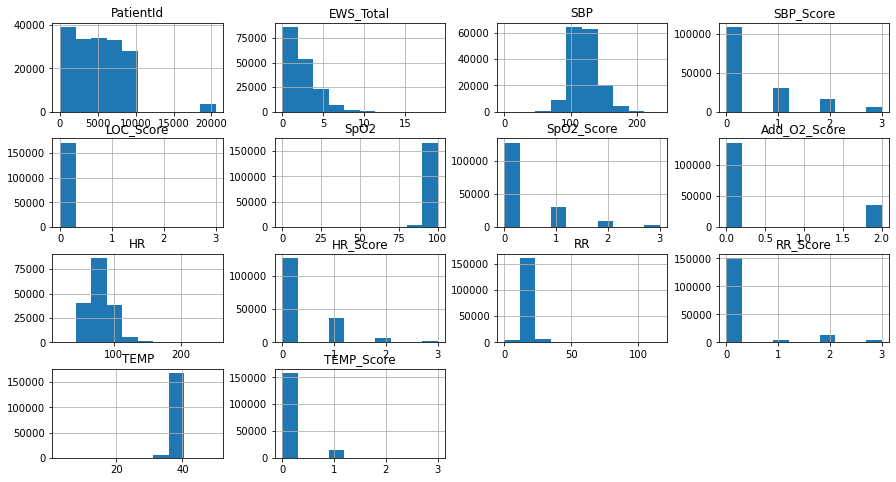

In [478]:
df.hist(figsize=(15,8))


In [479]:
##### pd.to_datetime(df['ObservationDate'])
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])


In [480]:
df['ObservationDate'].dtypes


dtype('<M8[ns]')

In [481]:
# df.dtypes

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171736 entries, 0 to 171735
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   PatientId        171736 non-null  int64         
 1   ObservationDate  171736 non-null  datetime64[ns]
 2   EWS_Total        171736 non-null  int64         
 3   SBP              160949 non-null  float64       
 4   SBP_Score        160949 non-null  float64       
 5   LOC              171736 non-null  object        
 6   LOC_Score        171736 non-null  int64         
 7   SpO2             171734 non-null  float64       
 8   SpO2_Score       171734 non-null  float64       
 9   Add_O2           171734 non-null  object        
 10  Add_O2_Score     171734 non-null  float64       
 11  HR               171736 non-null  int64         
 12  HR_Score         171736 non-null  int64         
 13  RR               171736 non-null  int64         
 14  RR_Score         171

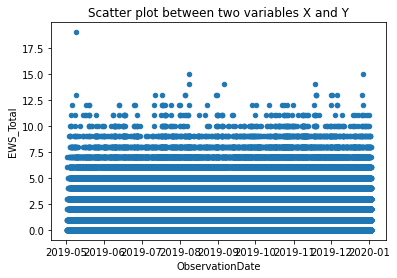

In [482]:



 df.plot.scatter(x='ObservationDate', y='EWS_Total', title= "Scatter plot between two variables X and Y");

# plot.show() 

# need to check for correlation 


In [483]:
df.isnull().sum()


PatientId              0
ObservationDate        0
EWS_Total              0
SBP                10787
SBP_Score          10787
LOC                    0
LOC_Score              0
SpO2                   2
SpO2_Score             2
Add_O2                 2
Add_O2_Score           2
HR                     0
HR_Score               0
RR                     0
RR_Score               0
TEMP                   0
TEMP_Score             0
dtype: int64

In [484]:
#Check the columns with NaN values¶

col_nan = df[['SBP','SBP_Score' ]]
col_nan.T

,0,1,2,3,4,5,6,7,8,9,...,171726,171727,171728,171729,171730,171731,171732,171733,171734,171735
SBP,143.0,NaN,117.0,NaN,135.0,NaN,NaN,NaN,125.0,NaN,...,90.0,NaN,147.0,145.0,137.0,88.0,83.0,118.0,129.0,133.0
SBP_Score,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,...,3.0,NaN,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0


In [485]:
#Fill NaN values with a mean value if possible¶


In [486]:
df['SBP'].fillna(value=df['SBP'].mean(), inplace=True)  # code for NaN => mean value

df['SBP_Score'].fillna(value=df['SBP_Score'].mean(), inplace=True)

df['SpO2_Score'].fillna(value=df['SpO2_Score'].mean(), inplace=True)
df['SpO2'].fillna(value=df['SpO2'].mean(), inplace=True)
df['Add_O2_Score'].fillna(value=df['Add_O2_Score'].mean(), inplace=True)


In [519]:
df.isnull().sum().sum() # check the total amount of NaN values in the database

0

In [488]:
df.isnull().sum()


PatientId          0
ObservationDate    0
EWS_Total          0
SBP                0
SBP_Score          0
LOC                0
LOC_Score          0
SpO2               0
SpO2_Score         0
Add_O2             2
Add_O2_Score       0
HR                 0
HR_Score           0
RR                 0
RR_Score           0
TEMP               0
TEMP_Score         0
dtype: int64

In [489]:
df.isnull().sum().sum() # check the total amount of NaN values in the database

2

In [490]:
# df = df.set_index('PatientId')


In [491]:
#Check the unique values per column
for i in df.columns:
    print(df[i].unique())

[   29    30    31 ... 20530 20531 20532]
['2019-05-01T13:27:50.000000000' '2019-05-01T15:27:44.000000000'
 '2019-05-01T15:54:27.000000000' ... '2020-01-02T09:03:14.000000000'
 '2020-01-02T09:03:20.000000000' '2020-01-02T09:03:56.000000000']
[ 0  3  1  2  6  7  5  4  9 10  8 11 12 19 13 14 15]
[143.         120.68866535 117.         135.         125.
 114.         140.         123.         110.         104.
  89.          87.         137.         112.         146.
  94.         127.          92.         201.         191.
  73.         102.         122.         106.         130.
 142.         189.         157.          97.         129.
 109.         121.         152.         132.         147.
 134.         158.         148.         111.         145.
 141.          85.         118.         133.         156.
 149.         124.         113.          93.         131.
 108.         119.         144.         139.         126.
 128.         105.         115.         103.          99.
  88.    

In [492]:
#Transforming text and categorical attributes¶

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder ()

for i in df.columns:
    if df[i].dtype == object:
        df[i] = encoder.fit_transform(df[i])
df.head()

,PatientId,ObservationDate,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
0,29,2019-05-01 13:27:50,0,143.000000,0.000000,0,0,96.0,0.0,0,0.0,80,0,18,0,36.6,0
1,30,2019-05-01 15:27:44,3,120.688665,0.499096,0,0,94.0,1.0,0,0.0,83,0,16,0,36.5,0
2,31,2019-05-01 15:54:27,1,117.000000,0.000000,0,0,95.0,1.0,0,0.0,75,0,14,0,37.3,0
3,32,2019-05-01 16:07:27,0,120.688665,0.499096,0,0,98.0,0.0,0,0.0,85,0,19,0,37.2,0
4,33,2019-05-01 17:03:16,0,135.000000,0.000000,0,0,97.0,0.0,0,0.0,89,0,14,0,36.1,0


In [493]:
df.groupby("ObservationDate").head()

,PatientId,ObservationDate,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
0,29,2019-05-01 13:27:50,0,143.000000,0.000000,0,0,96.0,0.0,0,0.0,80,0,18,0,36.6,0
1,30,2019-05-01 15:27:44,3,120.688665,0.499096,0,0,94.0,1.0,0,0.0,83,0,16,0,36.5,0
2,31,2019-05-01 15:54:27,1,117.000000,0.000000,0,0,95.0,1.0,0,0.0,75,0,14,0,37.3,0
3,32,2019-05-01 16:07:27,0,120.688665,0.499096,0,0,98.0,0.0,0,0.0,85,0,19,0,37.2,0
4,33,2019-05-01 17:03:16,0,135.000000,0.000000,0,0,97.0,0.0,0,0.0,89,0,14,0,36.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171731,20278,2020-01-02 08:57:05,3,88.000000,3.000000,0,0,100.0,0.0,0,0.0,72,0,14,0,36.1,0
171732,20480,2020-01-02 08:58:46,3,83.000000,3.000000,0,0,92.0,0.0,0,0.0,79,0,18,0,36.8,0
171733,2499,2020-01-02 09:03:14,0,118.000000,0.000000,0,0,98.0,0.0,0,0.0,82,0,20,0,36.2,0
171734,20527,2020-01-02 09:03:20,0,129.000000,0.000000,0,0,98.0,0.0,0,0.0,70,0,16,0,36.5,0


In [494]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171736 entries, 0 to 171735
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   PatientId        171736 non-null  int64         
 1   ObservationDate  171736 non-null  datetime64[ns]
 2   EWS_Total        171736 non-null  int64         
 3   SBP              171736 non-null  float64       
 4   SBP_Score        171736 non-null  float64       
 5   LOC              171736 non-null  int32         
 6   LOC_Score        171736 non-null  int64         
 7   SpO2             171736 non-null  float64       
 8   SpO2_Score       171736 non-null  float64       
 9   Add_O2           171736 non-null  int32         
 10  Add_O2_Score     171736 non-null  float64       
 11  HR               171736 non-null  int64         
 12  HR_Score         171736 non-null  int64         
 13  RR               171736 non-null  int64         
 14  RR_Score         171

In [495]:
ews_total = df["EWS_Total"].value_counts().sort_values()
ews_total


19        1
15        2
14        3
13       14
12       31
11       84
10      190
9       576
8      1144
7      2312
6      4787
5      8701
4     14289
3     22273
2     31214
1     38752
0     47363
Name: EWS_Total, dtype: int64

In [496]:
df.describe()


,PatientId,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
count,171736.000000,171736.000000,171736.000000,171736.000000,171736.000000,171736.000000,171736.000000,171736.000000,171736.000000,171736.000000,171736.000000,171736.000000,171736.000000,171736.000000,171736.000000,171736.000000
mean,5174.344669,1.929537,120.688665,0.499096,0.005555,0.011477,95.947407,0.355928,0.208232,0.416423,79.758921,0.320253,17.263102,0.245167,36.642783,0.083628
std,3613.339400,1.890388,18.974406,0.787066,0.110652,0.185201,3.777973,0.690067,0.406074,0.812055,17.467517,0.600285,3.364965,0.693101,0.525958,0.284159
min,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,2263.000000,0.000000,108.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,67.000000,0.000000,16.000000,0.000000,36.300000,0.000000
50%,4764.000000,1.000000,120.000000,0.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,78.000000,0.000000,17.000000,0.000000,36.600000,0.000000
75%,7549.000000,3.000000,131.000000,1.000000,0.000000,0.000000,98.000000,1.000000,0.000000,0.000000,90.000000,1.000000,19.000000,0.000000,36.900000,0.000000
max,20532.000000,19.000000,234.000000,3.000000,4.000000,3.000000,100.000000,3.000000,2.000000,2.000000,252.000000,3.000000,116.000000,3.000000,50.000000,3.000000


In [497]:
df.corr()

,PatientId,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
PatientId,1.000000,-0.030384,0.008703,0.000927,0.008047,0.011073,0.027193,-0.029066,-0.016462,-0.016462,-0.057268,-0.049046,-0.029104,0.004818,0.009706,-0.001624
EWS_Total,-0.030384,1.000000,-0.334607,0.431166,0.125888,0.135683,-0.274491,0.495175,0.621215,0.621256,0.426665,0.464483,0.394173,0.496666,0.120622,0.121473
SBP,0.008703,-0.334607,1.000000,-0.732087,-0.008307,-0.008463,0.006903,-0.001320,-0.046082,-0.046048,-0.057381,-0.036358,-0.006304,0.000621,-0.017291,0.017933
SBP_Score,0.000927,0.431166,-0.732087,1.000000,0.019172,0.017979,0.002456,-0.009818,0.024242,0.024212,0.028192,0.023399,0.000257,-0.001453,-0.014360,-0.003707
LOC,0.008047,0.125888,-0.008307,0.019172,1.000000,0.810111,-0.005959,0.016735,0.029333,0.029338,0.016699,0.013367,0.028775,0.036908,0.021420,0.012633
LOC_Score,0.011073,0.135683,-0.008463,0.017979,0.810111,1.000000,-0.005953,0.010546,0.020253,0.020258,0.018421,0.014235,0.028876,0.033740,0.025984,0.007321
SpO2,0.027193,-0.274491,0.006903,0.002456,-0.005959,-0.005953,1.000000,-0.447606,-0.160828,-0.160846,-0.129016,-0.084010,-0.108460,-0.049781,-0.067494,0.021476
SpO2_Score,-0.029066,0.495175,-0.001320,-0.009818,0.016735,0.010546,-0.447606,1.000000,0.220020,0.220045,0.105842,0.064512,0.102875,0.055375,0.083941,-0.015110
Add_O2,-0.016462,0.621215,-0.046082,0.024242,0.029333,0.020253,-0.160828,0.220020,1.000000,0.999887,0.226112,0.151507,0.207315,0.150794,0.133520,-0.038132
Add_O2_Score,-0.016462,0.621256,-0.046048,0.024212,0.029338,0.020258,-0.160846,0.220045,0.999887,1.000000,0.226129,0.151552,0.206816,0.150681,0.133510,-0.038121


<AxesSubplot:>

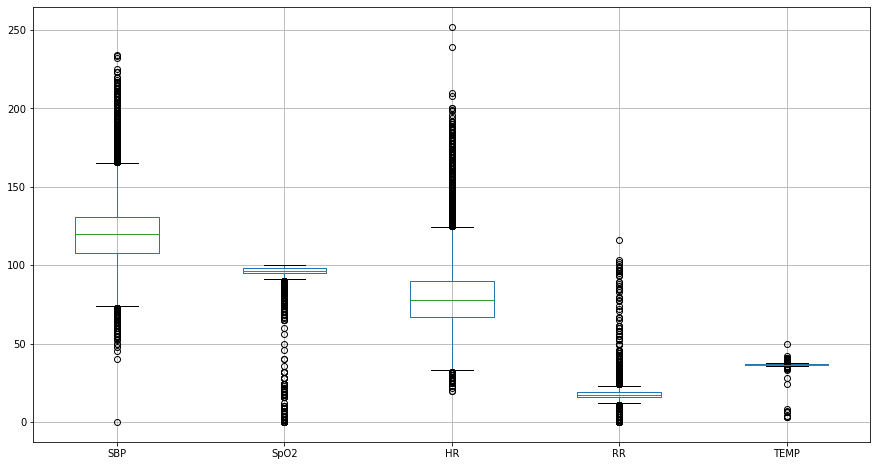

In [520]:
df.boxplot(column=['SBP','SpO2','HR','RR','TEMP'],figsize=(15,8))

## Heatmap of correlation of the EWS on the other features


Heatmap of correlation of the EWS on the other features


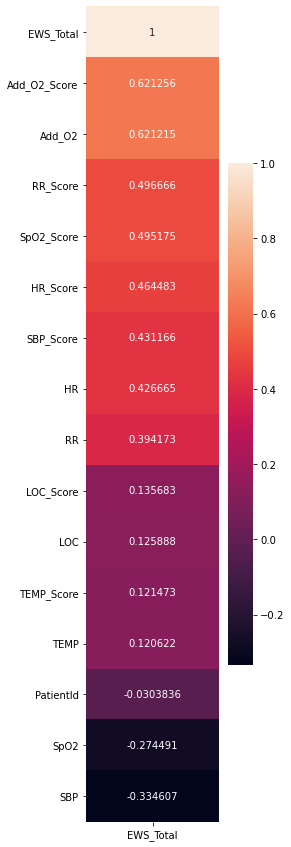

In [498]:
corr_df = df
riskCorr = pd.DataFrame(corr_df.corr()['EWS_Total'])
riskCorr = riskCorr.sort_values('EWS_Total',ascending=False)
plt.figure(figsize=(3, 15))
sns.heatmap(riskCorr, annot=True, fmt="g")
print('Heatmap of correlation of the EWS on the other features')

In [499]:
# corr_df = df
# riskCorr = pd.DataFrame(corr_df.corr()['TEMP'])
# # riskCorr = riskCorr.sort_values('TEMP',ascending=False)
# plt.figure(figsize=(3, 15))
# sns.heatmap(riskCorr, annot=True, fmt="g")
# print('Heatmap of correlation of the TEMP on the other features')

In [500]:
data_per_patient = df[df['PatientId'] == 'data_per_patient']



In [501]:
x = data_per_patient[['SpO2','Add_O2','HR','RR', 'LOC']]
y = data_per_patient.iloc[:, 1].values # columns 2 = EWS_total



In [502]:
x

,SpO2,Add_O2,HR,RR,LOC


In [503]:
y

array([], dtype='datetime64[ns]')

In [504]:
df.columns

Index(['PatientId', 'ObservationDate', 'EWS_Total', 'SBP', 'SBP_Score', 'LOC',
       'LOC_Score', 'SpO2', 'SpO2_Score', 'Add_O2', 'Add_O2_Score', 'HR',
       'HR_Score', 'RR', 'RR_Score', 'TEMP', 'TEMP_Score'],
      dtype='object')

NameError: name 'h2O_df' is not defined